# Simulação computacional FIS-32

Integrantes do grupo:

- Levi Gurgel de Lima
- Lucas Ayub Rodrigues Tuler
- Luís Felipe Bertuol
- Yves Gabriel Queiroz de Sousa

# 1) Problema escolhido:

Calcular o campo elétrico gerado por um anel eletricamente carregado em um ponto fora do seu eixo de simetria. A abordagem computacional foi particionar o anel em várias partes e assim somar a contribuição de cada parte para o campo elétrico total. Essa abordagem utiliza a mesma ideia teórica, porém sem integrar, apenas "somando". Aumentando a quantidade de partições do anel a tendência é que o somatório se aproxime cada vez mais da integral.

# 2) Funções para o cálculo do vetor campo elétrico: $\vec{E}$ e norma do vetor: $E$

In [56]:
# Bibliotecas
import numpy as np

# Função para calcular o vetor campo elétrico, através do somatório dos campos
def vec_E(Q, R, h, r, n):
    """
    Q: carga total do anel
    R: raio do anel
    h: altura do ponto em relação ao centro do anel
    r: distância do ponto em que o campo deve ser calculado ao eixo de simetria
    n: número de dQ's em que o anel vai ser particionado
    """
    
    # Constante eletrostática (k) em unidades SI
    k = 8.99*10**9

    # Valor de cada dQ
    dQ = Q / n

    # Inicializar o campo elétrico como zero
    E = np.array([0.0, 0.0, 0.0])

    # Loop para calcular o campo elétrico gerado por cada elemento de carga
    for i in range(n):
        # Ângulo correspondente à posição do elemento de carga no anel
        theta = 2 * np.pi * i / n

        # Posição do elemento de carga em coordenadas cartesianas
        x = R * np.cos(theta)
        y = R * np.sin(theta)
        z = 0

        # Vetor posição do ponto de observação em relação ao elemento de carga
        r_vec = np.array([ -x, r-y, h])

        # Distância do ponto de observação ao elemento de carga
        r_mod = np.sqrt(r_vec[0]**2 + r_vec[1]**2 + r_vec[2]**2) 

        # Vetor campo elétrico gerado pelo elemento de carga
        dE = k * dQ * r_vec / r_mod**3

        # Adicionar o campo elétrico gerado pelo elemento de carga ao campo elétrico total
        E += dE

    return E


# Função para calcular a norma do vetor campo elétrico
def norm_E(E):
    return np.sqrt(E[0]**2 + E[1]**2 + E[2]**2)

# 3) Testes de convergência do cálculo computacional

A seguir serão apresentados diferentes métodos para testar a proximidade do resultado computacional e o resultado teórico.

# 3.1) Ponto sobre o eixo z


Para um ponto sobre o eixo z temos o seguinte resultado teórico:

<img src="https://campoeletrico.files.wordpress.com/2014/02/rg1.png
" alt="Campo em um ponto sobre o eixo de simetria">

Pela simetria: $E_x = E_y = 0$.

Considerando uma carga $dQ$ sobre o anel temos que: $dQ = \lambda dL = \lambda Rd\theta$, onde $\lambda = \frac{Q}{2\pi R}$

Pela geometria a distância entre essa carga e o ponto sobre o eixo de simetria é: $d = \left(R^2+z^2\right)^{1/2}$.

Além disso, o cosseno do ângulo entre o eixo $z$ e o vetor posição é dado pela seguinte expressão: $\cos{\alpha} = \frac{z}{d}$.

Um infinitésimo do campo é dado por:

$$dE_{z} = \frac{1}{4\pi\epsilon_0}\frac{dQ \cos{\alpha}}{d^2}$$

$$dE_{z} = \frac{1}{4\pi\epsilon_0}\frac{\lambda Rz d\theta}{\left(R^2+z^2\right)^{3/2}}$$

Integrando:

$$E_{z} = \frac{1}{4\pi\epsilon_0} \int_{0}^{2\pi}\frac{\lambda Rz d\theta}{\left(R^2+z^2\right)^{3/2}}\,d\theta = \frac{1}{4\pi\epsilon_0}\frac{2\pi R\lambda z }{\left(R^2+z^2\right)^{3/2}}$$

Dessa forma obtemos o seguinte resultado final:

$$\vec{E}(0,0,z) = \frac{kQz}{(z^2 + R^2)^{3/2}}\hat{z}$$

Abaixo segue uma função que calcula o valor exato do campo em função da coordenada z.

In [57]:
# Função que calcula a norma do campo
def E_z(Q,R):
    k = 8.99*10**9
    return lambda z: (k*Q*z)/((z**2+R**2)**(3/2))


# 3.1.1) Resultado analítico
Considerando os seguintes valores para os parâmetros do problema:

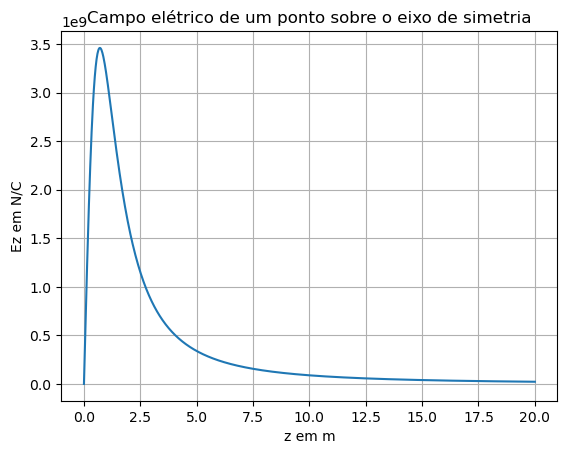

In [58]:
# Biblioteca para plotar gráfico:
import matplotlib.pyplot as plt

k = 8.99*10**9
Q = 1.0 # 1 C
R = 1.0 # 1 m

# Intervalo de valores de z
z = np.linspace(0, 20, 1000)
# Define a função do campo elétrico
Ez = E_z(Q,R)

plt.plot(z, Ez(z))
plt.xlabel('z em m')
plt.ylabel('Ez em N/C')
plt.title('Campo elétrico de um ponto sobre o eixo de simetria')
plt.grid(True)
plt.show()

Obtemos o gráfico para o valor do módulo do campo elétrico em função da coordenada $z$ considerando a solução analítica do problema. A seguir será feito o mesmo cálculo, porém utilizando a função citada em 1.1), ou seja, utilizando um método numérico.

# 3.1.2) Método computacional

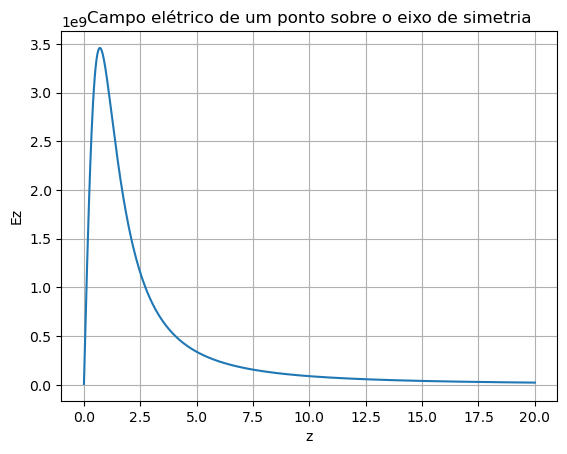

In [59]:
# Biblioteca para plotar gráfico:
# import matplotlib.pyplot as plt

k = 8.99*10**9
Q = 1.0 # 1 C
R = 1.0 # 1 m
r = 0 # ponto sobre o eixo de simetria
n = 1000 # quantidade de partições do anel

# Intervalo de valores de z
z = np.linspace(0.001, 20, 1000)

def vec_Z(Q, R, h, r, n):
    """
    Q: carga total do anel
    R: raio do anel
    h: altura do ponto em relação ao centro do anel
    r: distância do ponto em que o campo deve ser calculado ao eixo de simetria
    n: número de dQ's em que o anel vai ser particionado
    """
    
    # Constante eletrostática (k) em unidades SI
    k = 8.99*10**9

    # Valor de cada dQ
    dQ = Q / n

    # Inicializar o campo elétrico como zero
    E = np.array([0.0, 0.0, 0.0])

    # Loop para calcular o campo elétrico gerado por cada elemento de carga
    for i in range(n):
        # Ângulo correspondente à posição do elemento de carga no anel
        theta = 2 * np.pi * i / n

        # Posição do elemento de carga em coordenadas cartesianas
        x = R * np.cos(theta)
        y = R * np.sin(theta)
        z = 0

        # Vetor posição do ponto de observação em relação ao elemento de carga
        r_vec = np.array([ -x, r-y, h])

        # Distância do ponto de observação ao elemento de carga
        r_mod = np.sqrt(r_vec[0]**2 + r_vec[1]**2 + r_vec[2]**2) 

        # Vetor campo elétrico gerado pelo elemento de carga
        dE = k * dQ * r_vec / r_mod**3

        # Adicionar o campo elétrico gerado pelo elemento de carga ao campo elétrico total
        E += dE
    
    return abs(E[2])

ArrayComOsCampos = []

for i in range (1000):
    ArrayComOsCampos.append(vec_Z(Q, R, z[i], r, n))


plt.plot(z,ArrayComOsCampos)
plt.xlabel('z')
plt.ylabel('Ez')
plt.title('Campo elétrico de um ponto sobre o eixo de simetria')
plt.grid(True)
plt.show()


Como podemos perceber a forma de ambos os gráficos além dos valores parecem ser bem iguais, portanto para concluir que de fato o método numérico se aproxima de maneira considerável da solução analítica o gráfico do valor absoluto da diferença entre os dois resultados foi plotado abaixo.

# 3.1.3) Teste da proximidade entre os dois métodos

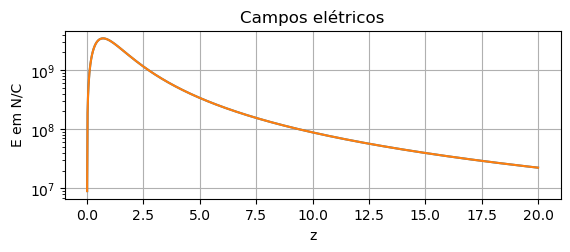

In [60]:
plt.subplot(2, 1, 1)
plt.plot(z, ArrayComOsCampos)
plt.plot(z, Ez(z))
plt.yscale("log")
plt.xlabel('z')
plt.ylabel('E em N/C')
plt.title('Campos elétricos')
plt.grid(True)
plt.show()

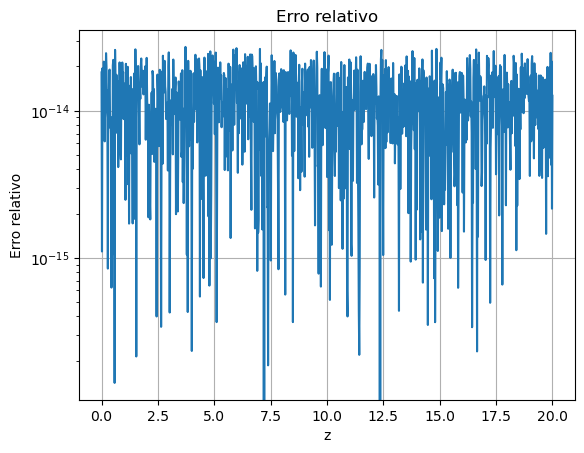

In [61]:
plt.plot(z,np.abs(ArrayComOsCampos - Ez(z))/Ez(z))
plt.yscale("log")
plt.xlabel('z')
plt.ylabel('Erro relativo')
plt.title('Erro relativo')
plt.grid(True)
plt.show()

Como podemos perceber para $1000$ pontos entre $0$ e $20$ o erro relativo entre o resultado analítico e o numérico é da ordem de $10^{-14}$, comprovante a proximidade entre ambos os métodos. Além disso, ambos os gráficos estão sobrepostos quando plotados simultaneamente.

# 3.2) Ponto sobre o plano xy

<img src="https://files.mtstatic.com/site_4539/5545/0/webview?Expires=1681404523&Signature=dsHisvRICTRDd1y0TwWXe7H9iV69QPKAapmT8Wddm6xiGZ-jL7jLZ3-9MK8DbFWFpn86rBqn1OI~Rff5QUwVBAtNTG0VdDenTRRN9c47B5bpfX52yImyBse50JLDo5AtXif4fEubzMzzsQAx2ThQb7W-zKL1UKVCL5dhLINmXh0_&Key-Pair-Id=APKAJ5Y6AV4GI7A555NA
" alt="Campo em um ponto sobre o plano do anel">

Considerando um anel com carga total $Q$, pela simetria a componente $E_y = 0$. Considerando pequenas cargas $dQ$, correspondentes a um comprimento de arco delimitado por um ângulo $\theta$ com a horizontal, de tal forma que o ângulo entre a reta que liga o ponto A e a carga com a horizontal é $\alpha$.

Temos que $dQ = \lambda dL = \lambda R d\theta $, mas $\lambda = \frac{Q}{2\pi R}$.


A distância entre o ponto e $dQ$ é dada pela Lei dos Cossenos é: $d^2 = R^2 + r^2 -2Rr\cos{\theta}$.

Além disso, por simples trigonometria o cosseno ângulo $\alpha$: $\cos{\alpha} = \frac{R\cos{\theta}-r}{d}$.

Dessa forma um infinitésimo da componente $x$ do campo é dada por:

$$dE_{x} = \frac{1}{4\pi\epsilon_0}\frac{dQ \cos{\alpha}}{d^2}$$

$$dE_{x} = \frac{Q}{8\pi^2 \epsilon_0}\frac{R\cos{\theta}-r}{\left(R^2 + r^2 -2Rr\cos{\theta}\right)^{3/2}}d\theta$$

Integrando de $0$ até $2\pi$ para "varrer" o anel inteiro obtemos:

$$E_{x} = \frac{Q}{8\pi^2 \epsilon_0}\int_{0}^{2\pi}  \frac{R\cos{\theta}-r}{\left(R^2 + r^2 -2Rr\cos{\theta}\right)^{3/2}}\,d\theta$$

Chamando $\int_{0}^{2\pi}  \frac{R\cos{\theta}-r}{\left(R^2 + r^2 -2Rr\cos{\theta}\right)^{3/2}}\,d\theta$ de $F(r)$ e $\frac{R\cos{\theta}-r}{\left(R^2 + r^2 -2Rr\cos{\theta}\right)^{3/2}}$ de $f(\theta)$, obtemos:

$$E_{x} = \frac{Q}{8\pi^2 \epsilon_0}F(r) = \frac{kQ}{2\pi}F(r)$$

Para o caso em que $r=0$, obtemos $F(0) = 0$, como é esperado o campo é nulo pela simetria.


A seguir o campo elétrico será calculado através da solução analítica encontrada acima, porém a integral $F(r)$ deve ser resolvida através de métodos numéricos. A abordagem para o cálculo dessa integral foi através de Soma de Riemann.

In [62]:
# Função a ser integrada (f(theta))
def f_theta(R,r):
    return lambda x: (R*np.cos(x)-r)/((R**2 + r**2 -2*R*r*np.cos(x))**(3/2))

# Cálculo da integral através da Soma de Riemann (integral de f(x) no intervalo [a,b])
def riemann_sum(f, a, b, n):
    # n é o número de partições
    dx = (b-a)/n
    xi = [a + i*dx + dx/2 for i in range(n)]
    return sum(f(x)*dx for x in xi)

# Cálculo da componente Ex do campo elétrico
def E_x(Q,F):
    k = 8.99*10**9
    return (k*Q*F)/(2*np.pi)

# 3.2.1) Resultado analítico

Considerando os seguintes parâmetros para o problema:

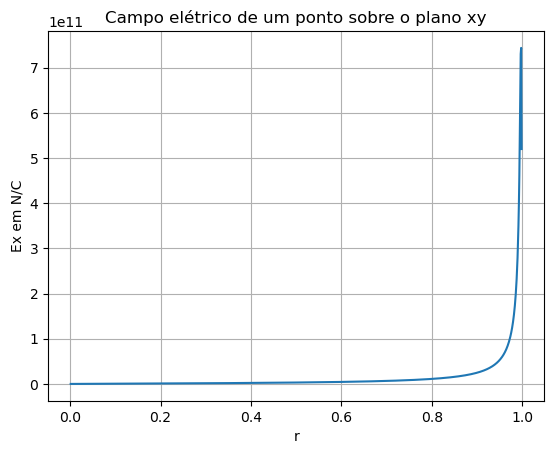

In [63]:
# Biblioteca para plotar gráfico:
import matplotlib.pyplot as plt

k = 8.99*10**9
Q = 1.0 # 1 C
R = 1.0 # 1 m

ArrayComCampo_x = []
array_r = []
r = 0
dr = 1/1001
for i in range(1000):
    r += dr # Posição do ponto
    f = f_theta(R,r)
    F = riemann_sum(f, 0, 2*np.pi, 1000)
    E = E_x(Q,F)
    array_r.append(r)
    ArrayComCampo_x.append(E)

plt.plot(array_r,ArrayComCampo_x)
plt.xlabel('r')
plt.ylabel('Ex em N/C')
plt.title('Campo elétrico de um ponto sobre o plano xy')
plt.grid(True)
plt.show()

Obtemos o gráfico para o valor do módulo do campo elétrico em função da coordenada $r$ considerando a solução analítica e aproximando numericamente a integral $F(r)$ que não possui solução analítica. A seguir será feito o mesmo cálculo, porém utilizando a função citada em 1.1).

# 3.2.2) Método computacional

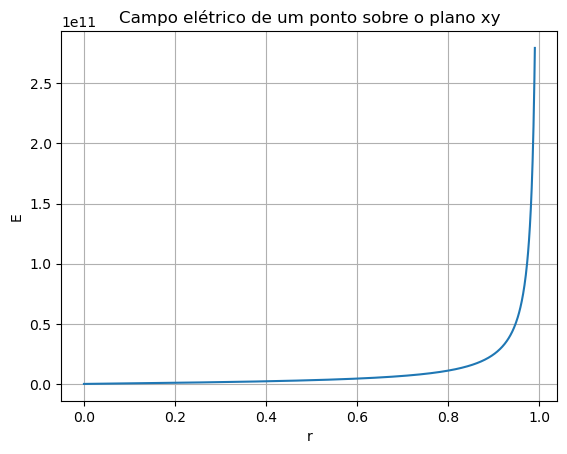

In [64]:
# Função para calcular o vetor campo elétrico, através do somatório dos campos
def Campo (Q, R, h, r, n):
    """
    Q: carga total do anel
    R: raio do anel
    h: altura do ponto em relação ao centro do anel
    r: distância do ponto em que o campo deve ser calculado ao eixo de simetria
    n: número de dQ's em que o anel vai ser particionado
    """
    
    # Constante eletrostática (k) em unidades SI
    k = 8.99*10**9

    # Valor de cada dQ
    dQ = Q / n

    # Inicializar o campo elétrico como zero
    E = np.array([0.0, 0.0, 0.0])

    # Loop para calcular o campo elétrico gerado por cada elemento de carga
    for i in range(n):
        # Ângulo correspondente à posição do elemento de carga no anel
        theta = 2 * np.pi * i / n

        # Posição do elemento de carga em coordenadas cartesianas
        x = R * np.cos(theta)
        y = R * np.sin(theta)
        z = 0

        # Vetor posição do ponto de observação em relação ao elemento de carga
        r_vec = np.array([ -x, r-y, h])

        # Distância do ponto de observação ao elemento de carga
        r_mod = np.sqrt(r_vec[0]**2 + r_vec[1]**2 + r_vec[2]**2) 

        # Vetor campo elétrico gerado pelo elemento de carga
        dE = k * dQ * r_vec / r_mod**3

        # Adicionar o campo elétrico gerado pelo elemento de carga ao campo elétrico total
        E += dE

    return np.linalg.norm(E)

k = 8.99*10**9
Q = 1.0 # 1 C
R = 1.0 # 1 m
n = 1000 # quantidade de partições do anel
h = 0 # altura do ponto

# Intervalo de valores de z
x = np.linspace(0.0001, 0.99, 1000)


ArrayComOsCampos = []

for i in range (1000):
    ArrayComOsCampos.append(Campo(Q, R, 0,  R*x[i], n))


plt.plot(x,ArrayComOsCampos)
plt.xlabel('r')
plt.ylabel('E')
plt.title('Campo elétrico de um ponto sobre o plano xy')
plt.grid(True)
plt.show()

Assim como nos resultados apresentados em 3.1.2) o método computacional e o método analítico possuem valores aparentemente parecidos, além do "formato" do gráfico similar.

# 3.1.3) Teste da proximidade entre os dois métodos

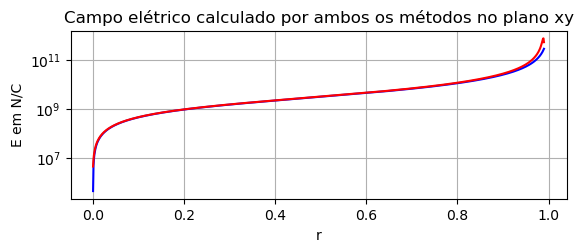

In [65]:
# ArrayPlot = []

# for i in range (1000):
#     ArrayPlot.append(abs(ArrayComOsCampos[i] - ArrayComCampo_x[i])/ArrayComCampo_x[i])

# plt.plot(x,ArrayPlot)
plt.subplot(2, 1, 1)
plt.plot(x, ArrayComOsCampos, color = 'blue')
plt.plot(x, ArrayComCampo_x, color = 'red')
plt.yscale("log")
plt.xlabel('r')
plt.ylabel('E em N/C')
plt.title('Campo elétrico calculado por ambos os métodos no plano xy')
plt.grid(True)
plt.show()

Ambos os gráficos estão sobrepostos, ou seja, mostrando que possuem valores próximos, como já era esperado por ambos possuírem formatos parecidos.

# 4) Conclusões

Tendo em vista a alta precisão do método para os casos apresentados em 3.1) e 3.2) é de se esperar que ele constitua uma boa aproximação para um ponto qualquer não pertencente ao anel no $\mathbb{R}^3$. 